In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [34]:
df_train = pd.read_csv("../data/train.csv")
df_test=pd.read_csv("../data/test.csv")

# Drop Id columns
df_train = df_train.drop(['Id'],axis=1)
df_test = df_test.drop(['Id'],axis=1)

print("Training Dataframe shape:\t ",df_train.shape,"\nTesting Dataframe shape:\t",df_test.shape)

Training Dataframe shape:	  (1460, 80) 
Testing Dataframe shape:	 (1459, 79)


## Let's know the Data (or EDA: Exploratory Data Analysis)

## Continuous Data

### List of continuos Columns

In [21]:
continuous_cols = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF",
                   "TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF",
                   "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","LowQualFinSF",
                   "BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
                   "Fireplaces","GarageCars"
                  ]

ordinal_variable = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
            'HeatingQC','Electrical','KitchenQual','FireplaceQu',
            'GarageFinish','GarageQual','GarageCond','PoolQC',
            'BsmtExposure','BsmtFinType1','BsmtFinType2']

## Scatter Plots

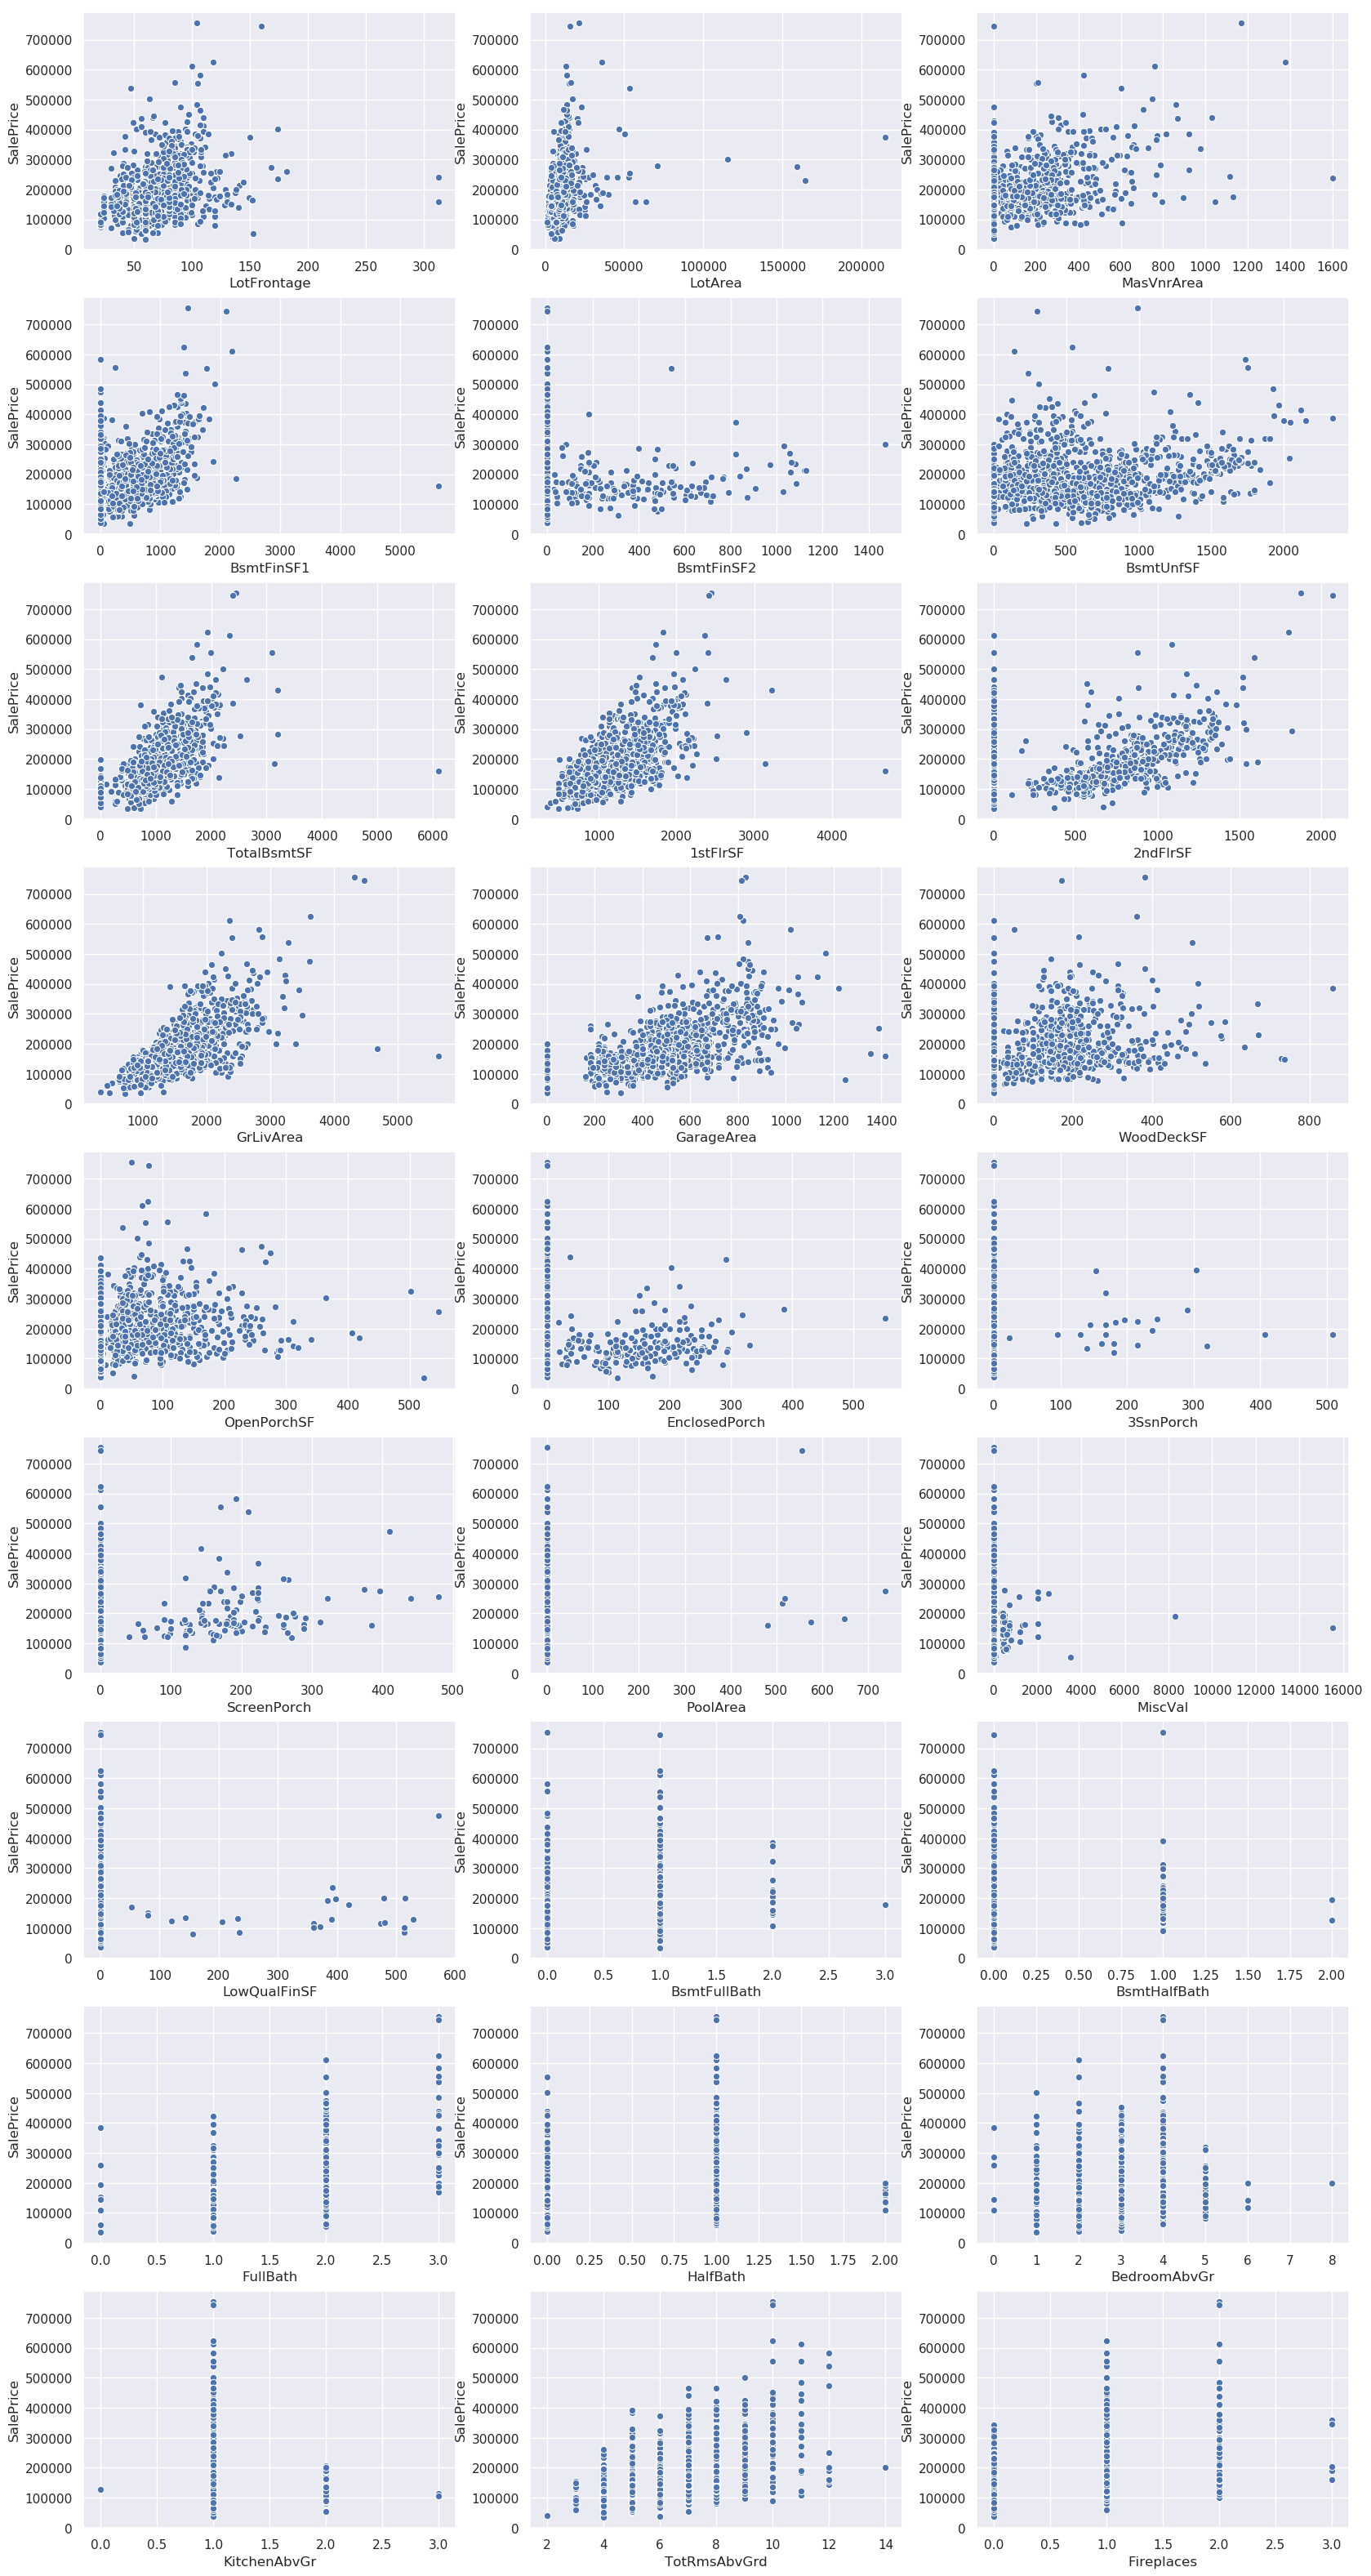

In [23]:
#set theme for seaborn plot
sns.set()
fig, axes =plt.subplots(9,3,figsize=(20, 40))
for cols in range(27):
    column = continuous_cols[cols]
    sns.scatterplot(x=column, y='SalePrice', data=df_train,ax=axes[int(cols/3)][cols%3])
# last 2 plots are empty

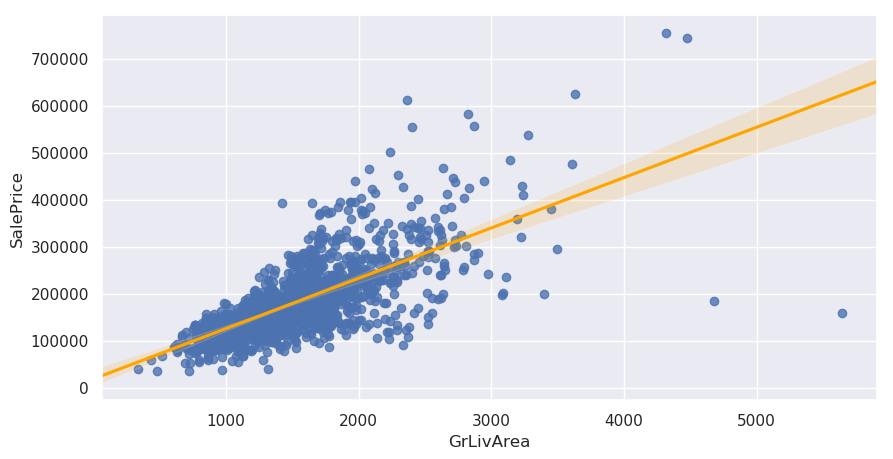

In [24]:
plt.figure(figsize=(10,5))
sns.regplot(x="GrLivArea", y="SalePrice", data=df_train,line_kws={"color": "orange"});

## Get Correlation Matrix

/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


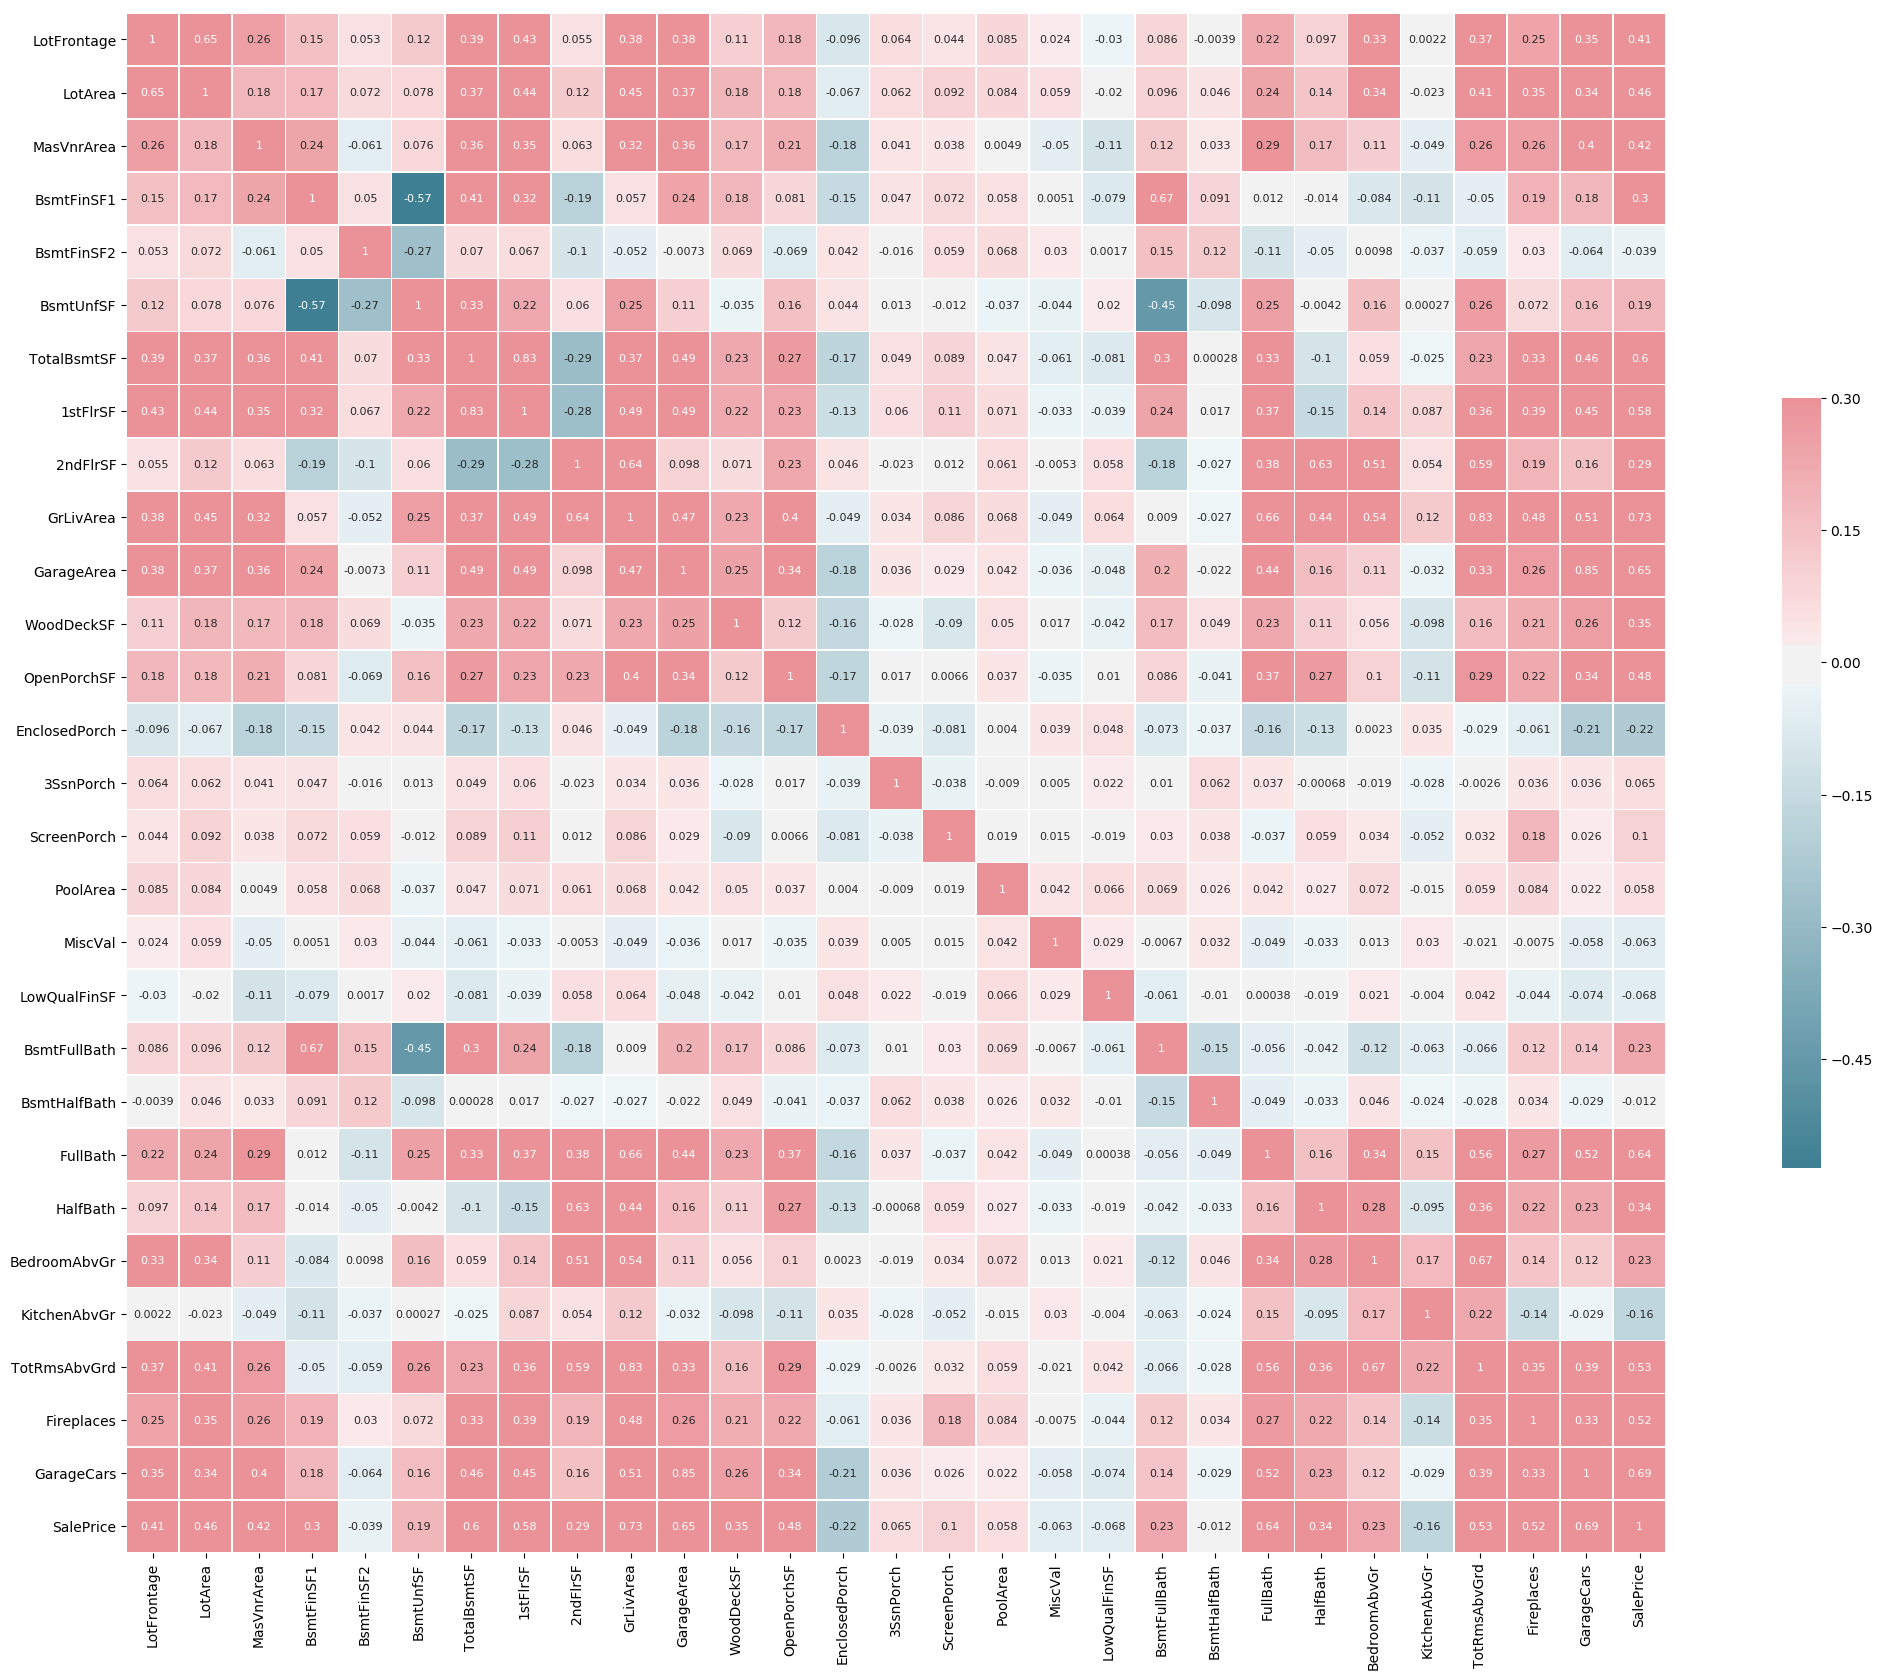

In [26]:
sns.reset_orig()   
# Compute the correlation matrix
corr = df_train[(continuous_cols+['SalePrice'])].corr('spearman')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,annot_kws={"size": 8})

## Categorical Data

### List of Categorical Columns

In [27]:
# Use a function
# Iterate over columns of df (except last column SalePrice)
# Exclude those which are in Continuous Columns
categorical_cols = [x for x in list(df_train.iloc[:,:-1].columns) if x not in continuous_cols]

In [28]:
len(categorical_cols)

51

## Get Boxplots

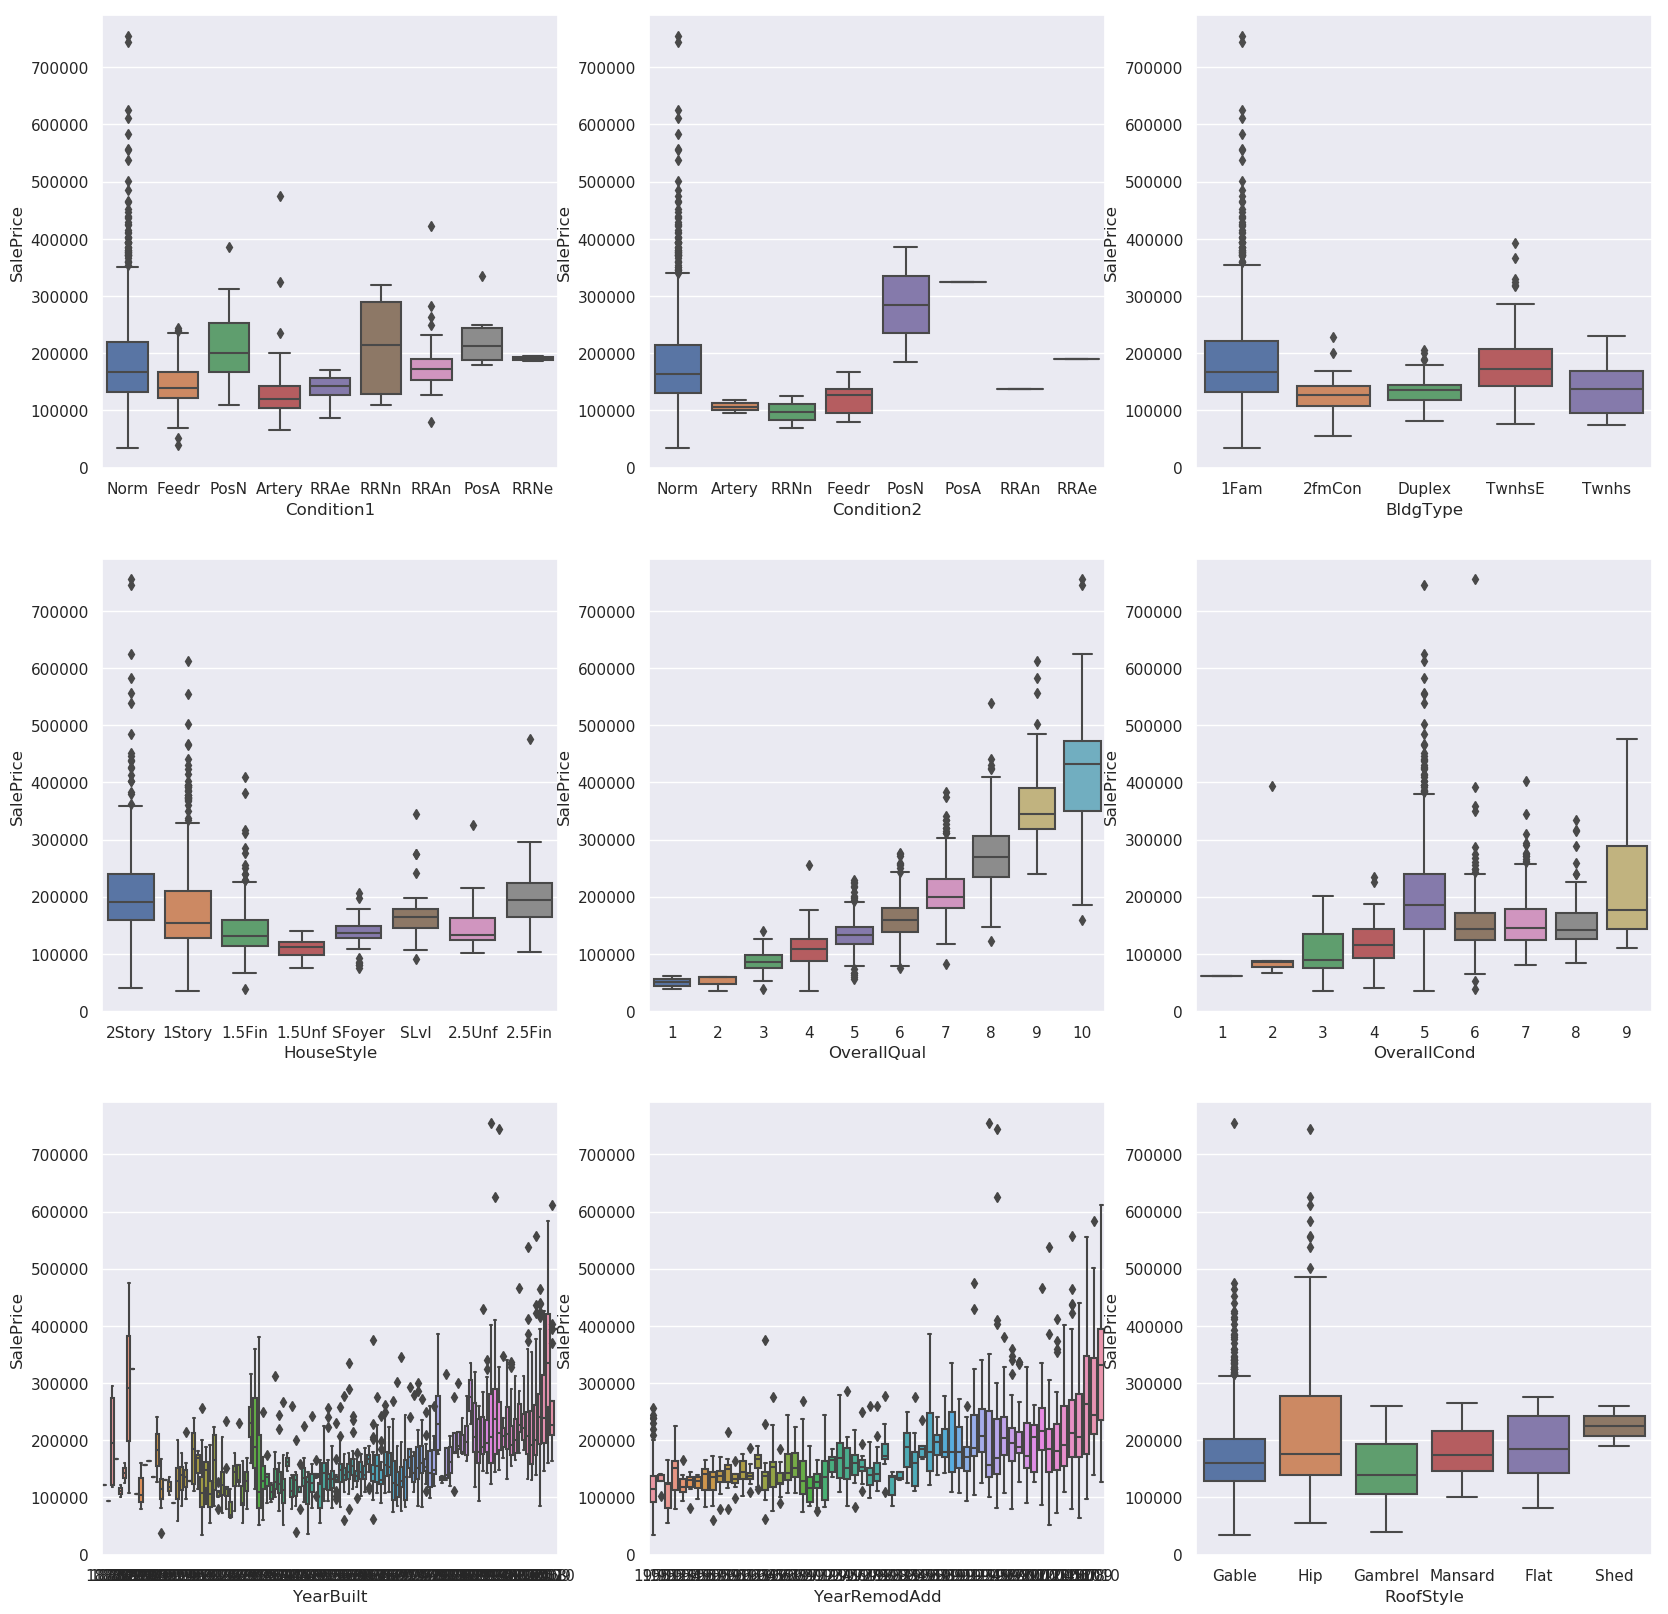

In [29]:
#set theme for seaborn plot
sns.set()
# I have only plotted 16 of the 60 categorical variables here
# Do fig, axes =plt.subplots(15,4,figsize=(60,60)) for all but then you can't see anything
# Better to see all of them one at a time
fig, axes =plt.subplots(3,3,figsize=(20,20))
for cols in range(9):
    column = categorical_cols[cols+10]
    sns.boxplot(x=column, y="SalePrice",data=df_train,ax=axes[int(cols/3)][cols%3])
    

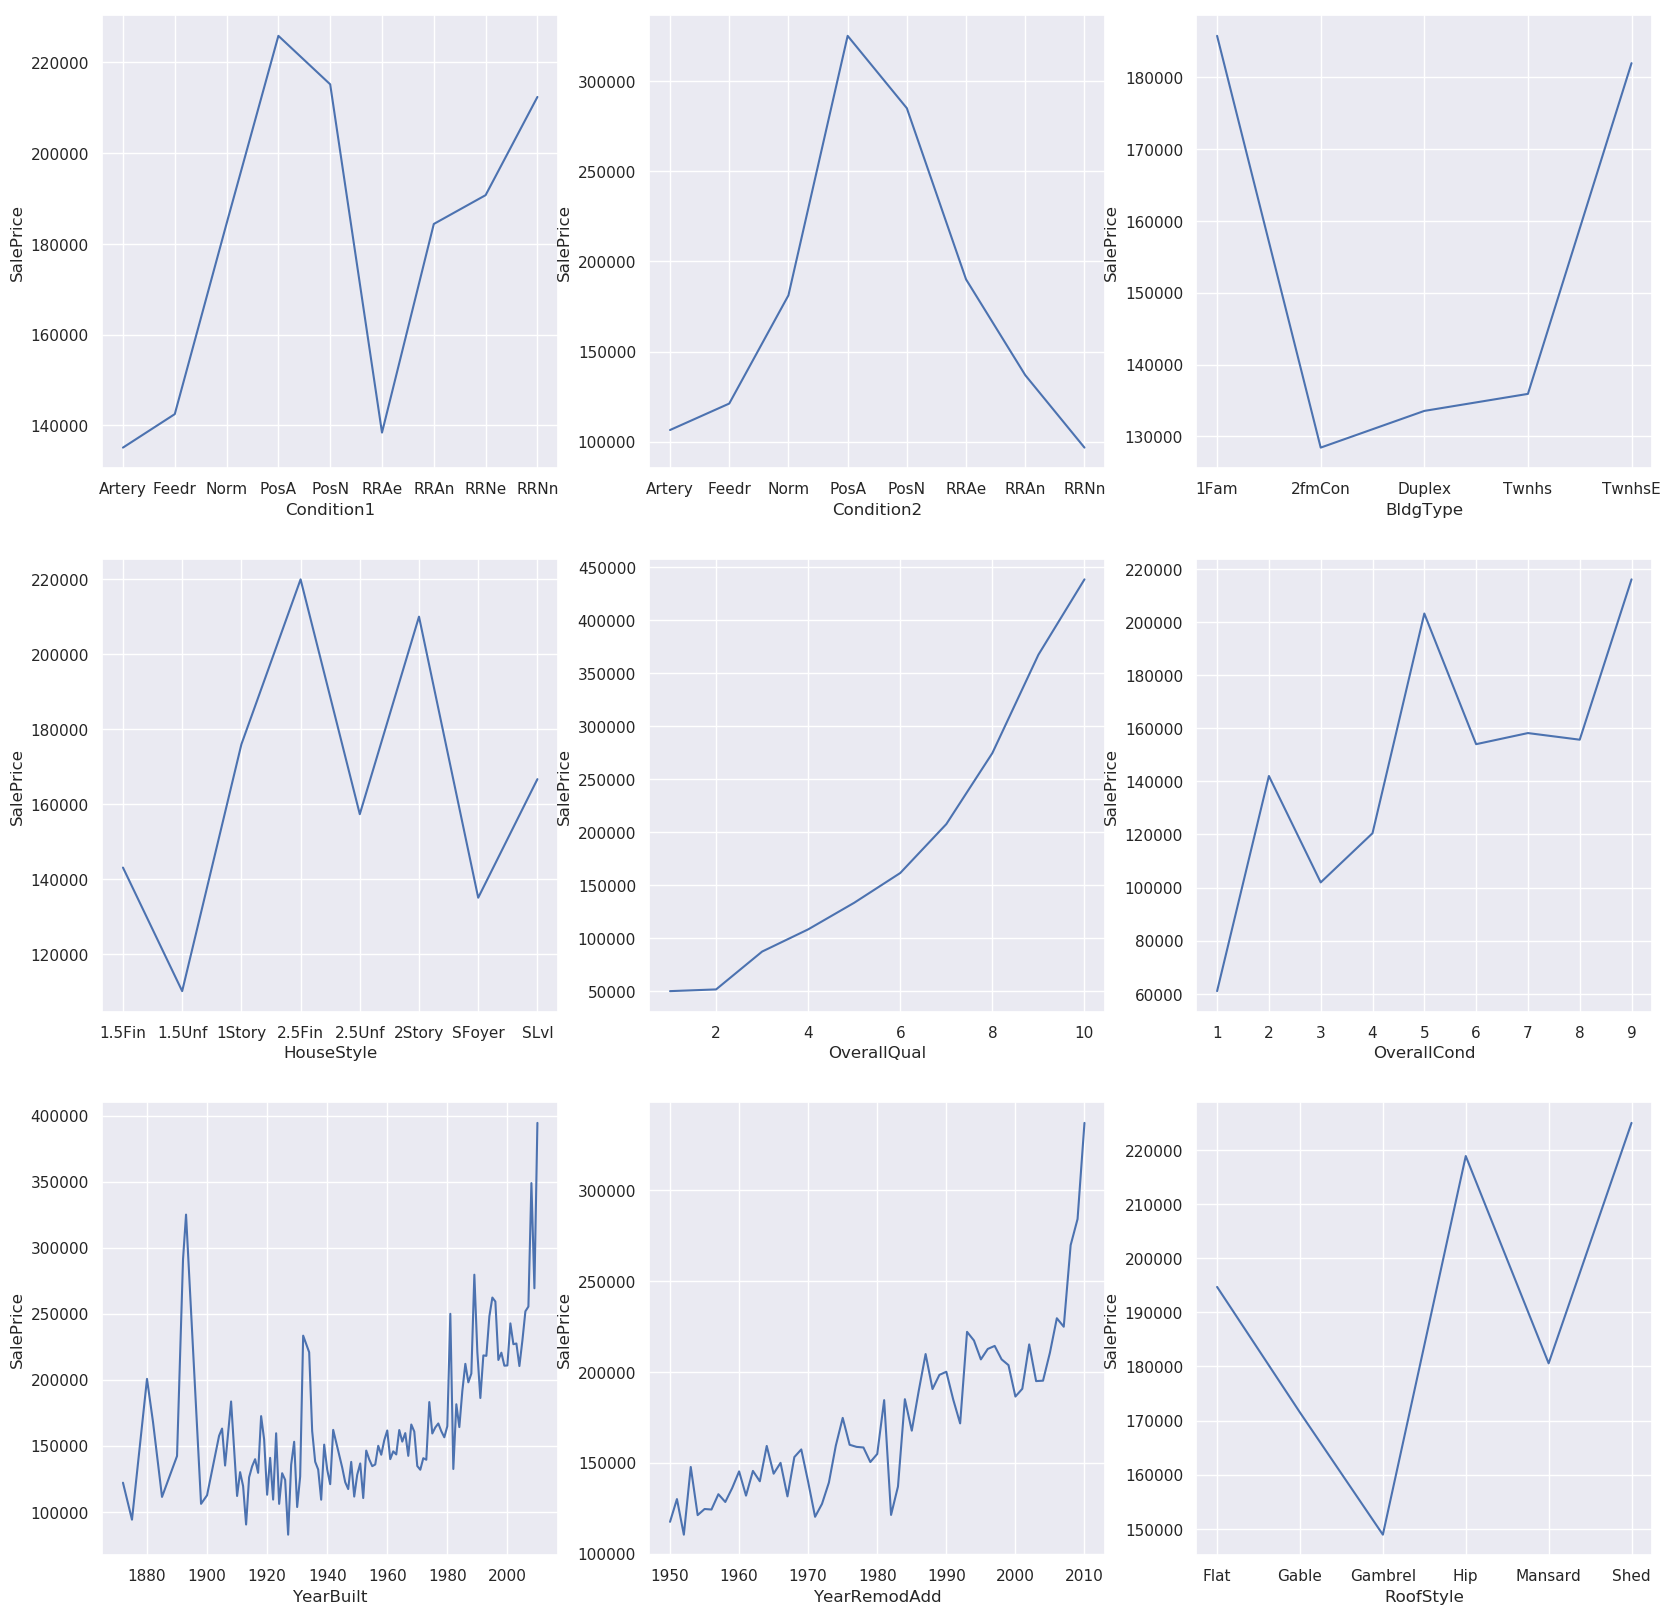

In [30]:
#set theme for seaborn plot
sns.set()
# I have only plotted 16 of the 60 categorical variables here
# Do fig, axes =plt.subplots(15,4,figsize=(60,60)) for all but then you can't see anything
# Better to see all of them one at a time
fig, axes =plt.subplots(3,3,figsize=(20,20))
for cols in range(9):
    column = categorical_cols[cols+10]
    temp_Df = df_train[[column,'SalePrice']].groupby(column).mean().reset_index()
#     print(temp_Df.head())
    sns.lineplot(x=temp_Df[column], y=temp_Df["SalePrice"],ax=axes[int(cols/3)][cols%3])

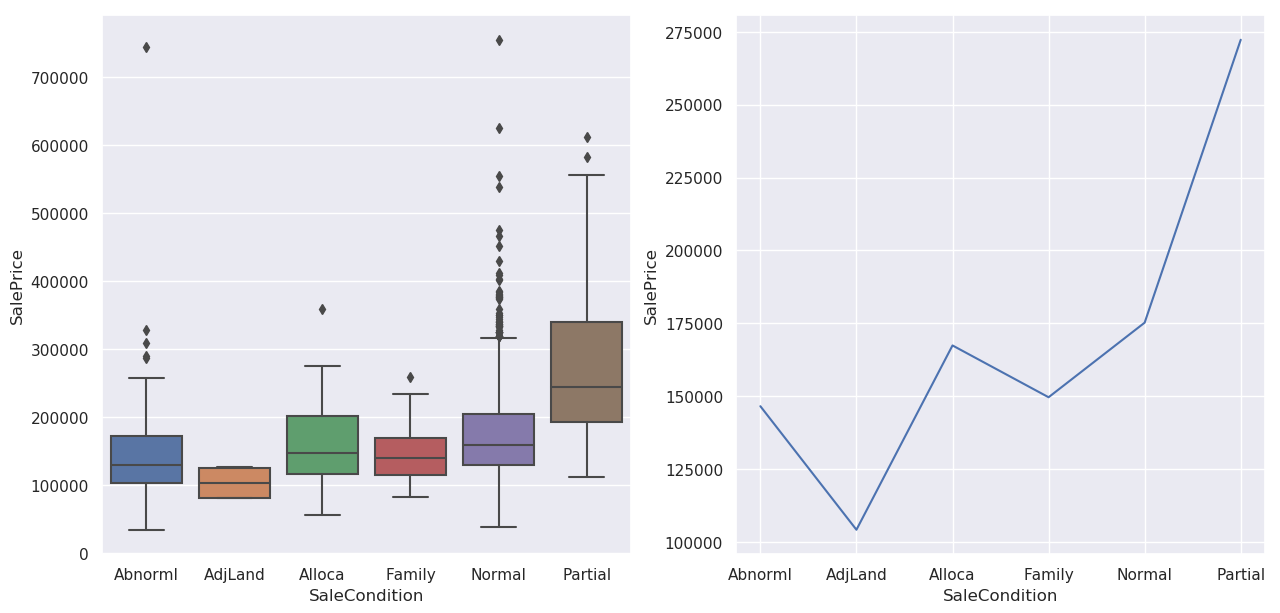

In [31]:
sns.set()
fig, axes =plt.subplots(1,2,figsize=(15,7))
sns.set_style("whitegrid")
sns.boxplot(x=df_train['SaleCondition'], y=df_train["SalePrice"],data=df_train,ax=axes[0],
            order = ['Abnorml','AdjLand','Alloca','Family','Normal','Partial'])
temp_Df =df_train[['SaleCondition','SalePrice']].groupby('SaleCondition').mean().reset_index()
sns.lineplot(x=temp_Df['SaleCondition'], y=temp_Df["SalePrice"],ax=axes[1])

## Ordinal Variables

### I have to convert ordinal variable values to numbers

In [32]:
def util(val):
    if(val in ('Ex','GLQ','SBrkr')):
        return 5
    elif(val in ('Gd','ALQ','Rec','FuseA')):
        return 4
    elif(val in ('Ta','Av','BLQ','FuseF','Fin')):
        return 3
    elif(val in ('Fa','Mn','LwQ','FuseP','RFn')):
        return 2
    elif(val in ('Po','No','Unf','Mix','Unf')):
        return 1
    else:
        return 0

def string_to_numbers(df):
    cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
            'HeatingQC','Electrical','KitchenQual','FireplaceQu',
            'GarageFinish','GarageQual','GarageCond','PoolQC',
            'BsmtExposure','BsmtFinType1','BsmtFinType2']
    
    for i in cols:
        df[i] = df.apply(lambda x:util(x[i]),axis=1).astype(int)
    return df

In [35]:
df_train = string_to_numbers(df_train)

In [36]:
ordinal_variable = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
            'HeatingQC','Electrical','KitchenQual','FireplaceQu',
            'GarageFinish','GarageQual','GarageCond','PoolQC',
            'BsmtExposure','BsmtFinType1','BsmtFinType2']


/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


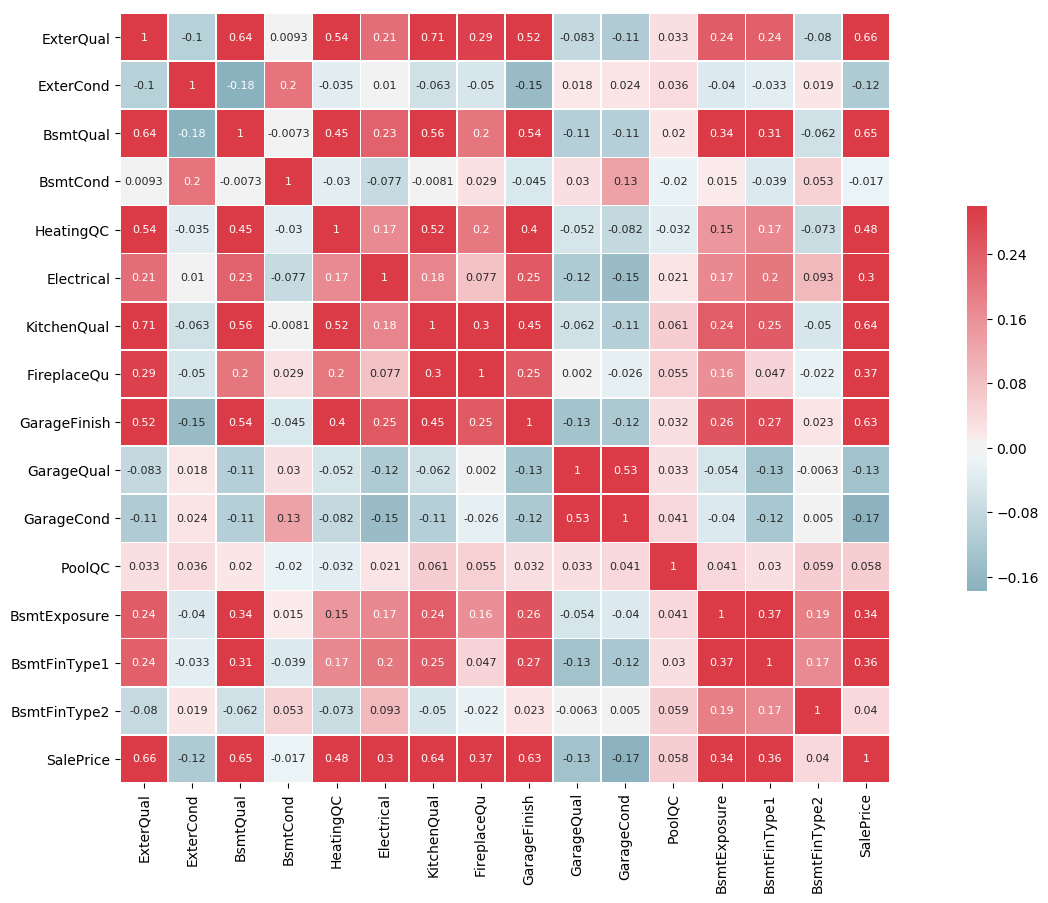

In [37]:
sns.reset_orig()   
# Compute the correlation matrix
corr = df_train[(ordinal_variable+['SalePrice'])].corr('spearman')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,annot_kws={"size": 8})

/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/shad3/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


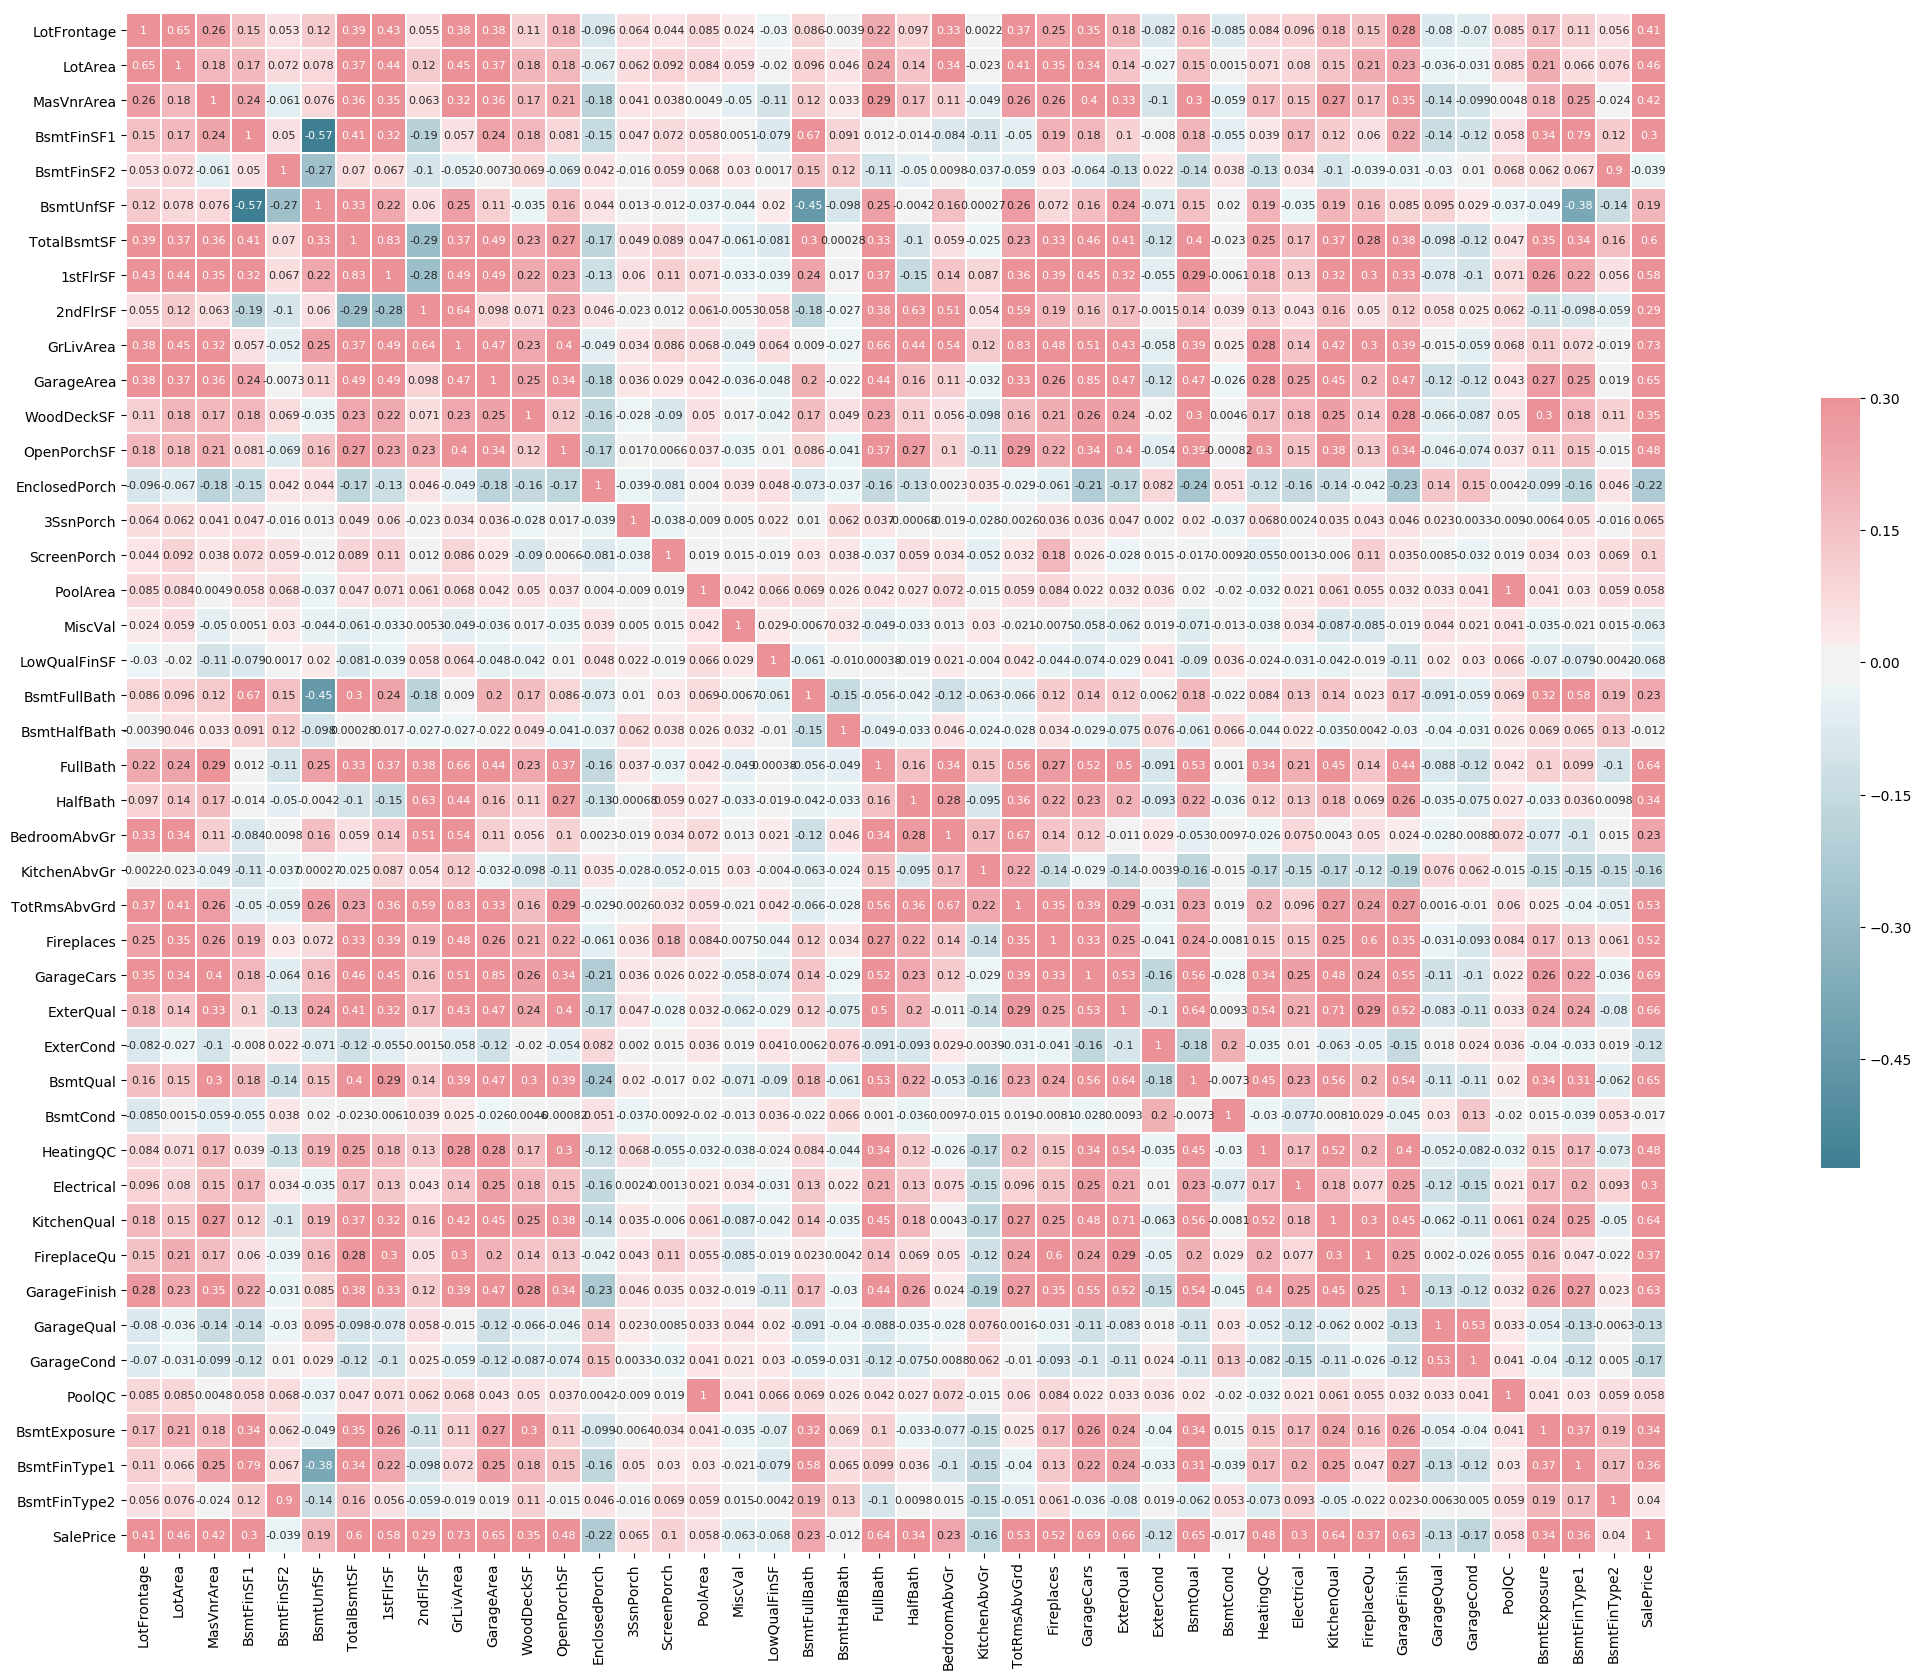

In [38]:
sns.reset_orig()   
# Compute the correlation matrix
corr = df_train[(continuous_cols+ordinal_variable+['SalePrice'])].corr('spearman')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True,annot_kws={"size": 8})

## If you want to see the Correlation Value Just for SalePrice

In [39]:
corr = df_train[(continuous_cols+ordinal_variable+['SalePrice'])].corr('spearman')
pd.set_option("max_columns",None)
corr.iloc[-1:,:].T

,SalePrice
LotFrontage,0.409076
LotArea,0.456461
MasVnrArea,0.421309
BsmtFinSF1,0.301871
BsmtFinSF2,-0.038806
BsmtUnfSF,0.185197
TotalBsmtSF,0.602725
1stFlrSF,0.575408
2ndFlrSF,0.293598
GrLivArea,0.731310
